In [34]:
#To conduct K-Means clustering followed by Principle COmponent Analysis in order to segment the credit card market.
#Segmentation is conducted in order to identify different segments to personlise strategies for segements separately.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('C:/Users/vishn/Downloads/archive (3)/CC GENERAL.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print("The minimum, mean and maximum balance are:", "\n", creditcard_df["BALANCE"].min(), "\n", creditcard_df["BALANCE"].mean(), "\n", creditcard_df["BALANCE"].max(), "\n")
creditcard_df.describe()

The minimum, mean and maximum balance are: 
 0.0 
 1564.4748276781006 
 19043.13856 



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == creditcard_df["ONEOFF_PURCHASES"].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
x = creditcard_df[creditcard_df["CASH_ADVANCE"] == creditcard_df["CASH_ADVANCE"].max()]
x

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [7]:
y = x["CUST_ID"].item()
z = x["CASH_ADVANCE"].item()
print(f"This person with the id {y} paid a cash advance of {z}")

This person with the id C12226 paid a cash advance of 47137.21176


In [8]:
b = creditcard_df
creditcard_df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#As we can see, there are many null values concentrated in 2 columns, in the next step, we eliminate these null values.

In [9]:
b.loc[b['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = b['CREDIT_LIMIT'].mean()
b.loc[b['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = b['MINIMUM_PAYMENTS'].mean()
b.isnull().sum()
b.duplicated().sum()
b.drop("CUST_ID", axis = 1, inplace= True)

<Axes: >

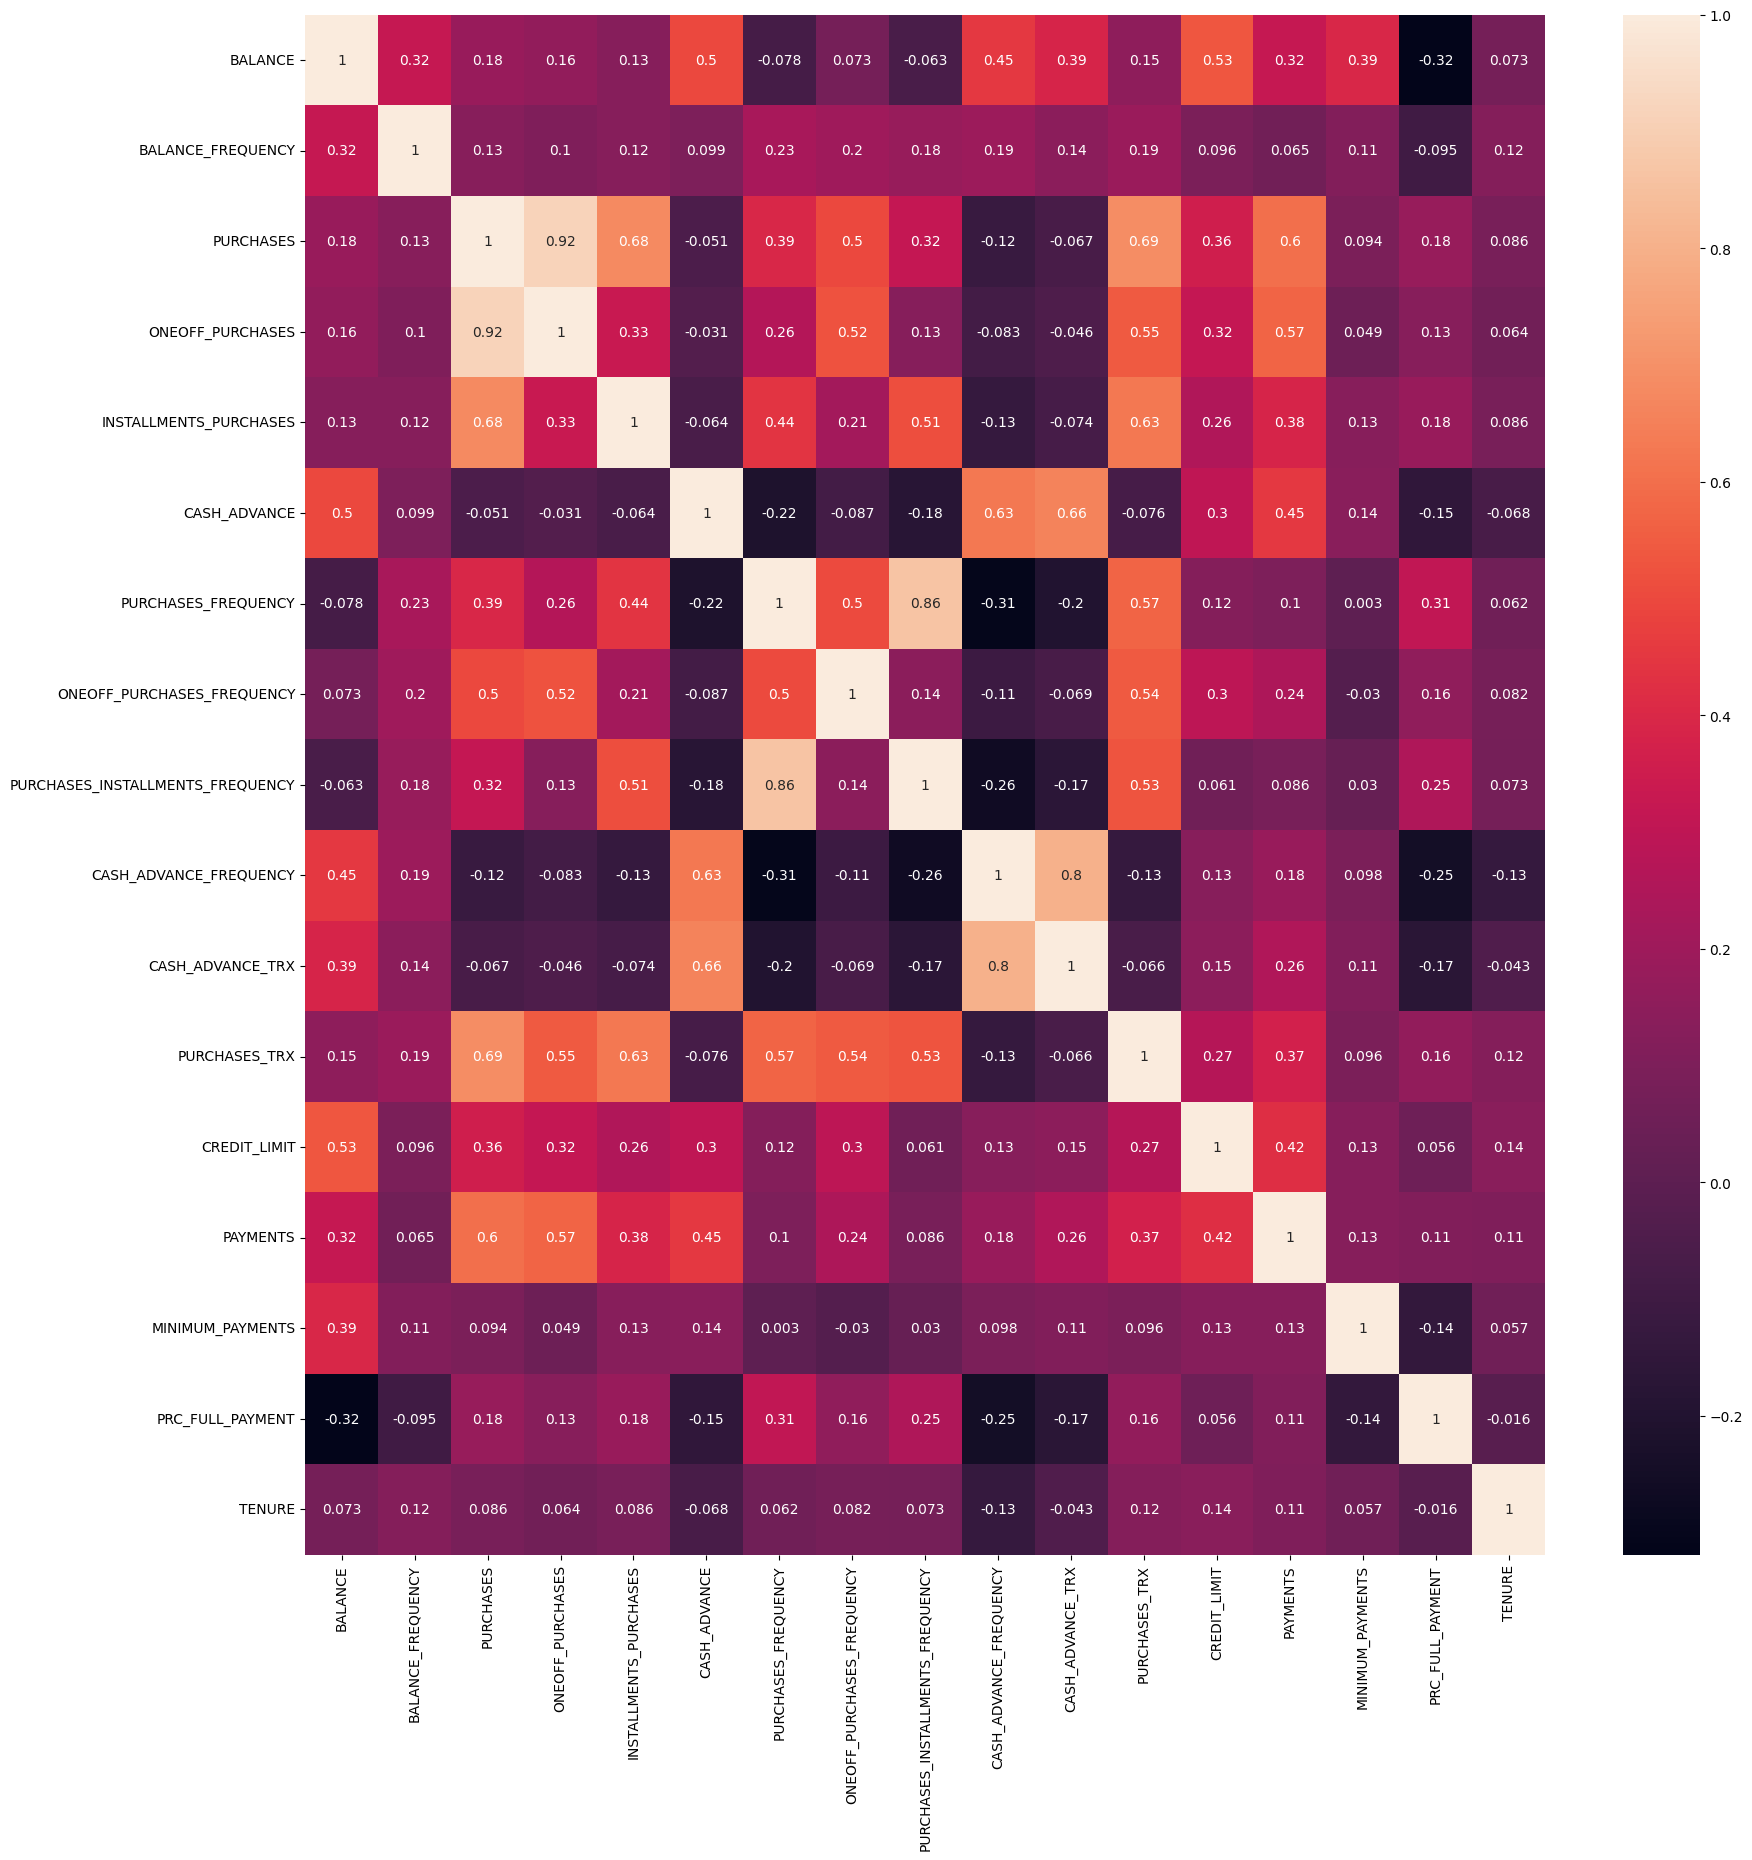

In [11]:
corr = b.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)


In [ ]:
#The heatmap shows the positive/negative correlation between the features.
#Hence we can figure out how are the different factors dependent on each other

In [12]:
scaler = StandardScaler()
bs = scaler.fit_transform(b)
bs.shape

(8950, 17)

In [13]:
bs

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

<function matplotlib.pyplot.show(close=None, block=None)>

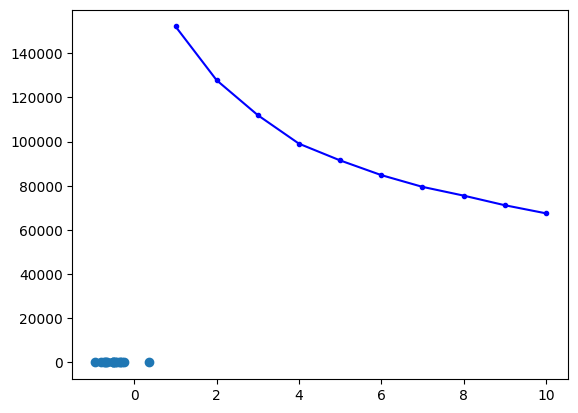

In [20]:
plt.scatter(bs[0], bs[1])
kmeans_kwargs={
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}
sse=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(bs)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11), sse, 'b.-')
plt.show

In [22]:
#now as we can see on the elbow curve, the hinge is seen at i = 4, however it is at i=7 that the graph is linear
#Hence we choose number of clusters as 7

In [24]:
kmeans = KMeans(7)
kmeans.fit(bs)
labels = kmeans.labels_

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.034516,0.465119,2.482891,1.799161,2.565390,-0.152270,1.160821,1.550498,1.267750,-0.279687,-0.148281,3.086765,1.287772,1.437054,0.551365,0.245055,0.338036
1,-0.391216,0.309124,-0.062412,-0.257729,0.325872,-0.360663,0.981143,-0.413572,1.176227,-0.462587,-0.357924,0.138996,-0.321593,-0.242049,-0.049927,0.355562,-0.024461
2,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
3,-0.122959,0.395157,0.516664,0.639910,0.045872,-0.326983,0.954390,1.829169,0.179062,-0.400418,-0.322315,0.594466,0.420570,0.124130,-0.156477,0.398023,0.199943
4,1.605017,0.379023,-0.227832,-0.162367,-0.240481,1.948583,-0.484767,-0.211842,-0.430327,1.900472,1.842437,-0.281507,0.971442,0.731257,0.510419,-0.396454,-0.092385
5,-0.697882,-2.135949,-0.318041,-0.236894,-0.316686,-0.304909,-0.564416,-0.435123,-0.459123,-0.486812,-0.359926,-0.427986,-0.209380,-0.213261,-0.255441,0.254647,-0.150924
6,-0.013522,0.369304,-0.362789,-0.245719,-0.406297,-0.076912,-0.871217,-0.402715,-0.769730,0.146842,-0.019379,-0.490055,-0.344834,-0.267388,-0.027145,-0.454484,-0.012558


In [26]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3717.732252,0.987453,6307.940661,3578.675923,2730.917631,659.553102,0.956244,0.665001,0.868274,0.079176,2.236915,91.435262,9179.889807,5893.273022,2149.138853,0.225389,11.969697
1,750.191673,0.950499,869.860943,164.660083,705.750000,222.543717,0.884131,0.079081,0.831900,0.042576,0.806259,18.164749,3324.361889,1032.435604,747.853336,0.257711,11.484584
2,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
3,1308.545105,0.970880,2107.064869,1654.556388,452.548711,293.172133,0.873393,0.748134,0.435601,0.055016,1.049261,29.486043,6024.654426,2092.489404,499.543847,0.270130,11.784893
4,4905.181631,0.967058,516.437632,322.941211,193.603442,5065.140385,0.295790,0.139261,0.193414,0.515448,15.822105,7.712632,8028.952153,3850.060950,2053.717505,0.037759,11.393684
5,111.891768,0.371284,323.705428,199.241534,124.692729,339.462343,0.263823,0.072652,0.181970,0.037728,0.792598,4.071704,3732.639857,1115.774153,268.912733,0.228195,11.315343
6,1536.329690,0.964755,228.100356,184.594250,43.658544,817.583734,0.140689,0.082320,0.058527,0.164529,3.116581,2.528889,3239.800570,959.081197,800.946973,0.020786,11.500513


In [30]:
y_kmeans = kmeans.fit_predict(bs)
b_cluster = pd.concat([b, pd.DataFrame({'cluster':labels})], axis = 1)
b_cluster.head()

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


In [ ]:
#Now we conduct PCA to reduce the dimensions of data in order to conduct better visualisation.

In [32]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(bs)
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076447,6
1,-1.138295,2.506475,4
2,0.969683,-0.383512,3
3,-0.873629,0.043171,6
4,-1.599434,-0.688578,6


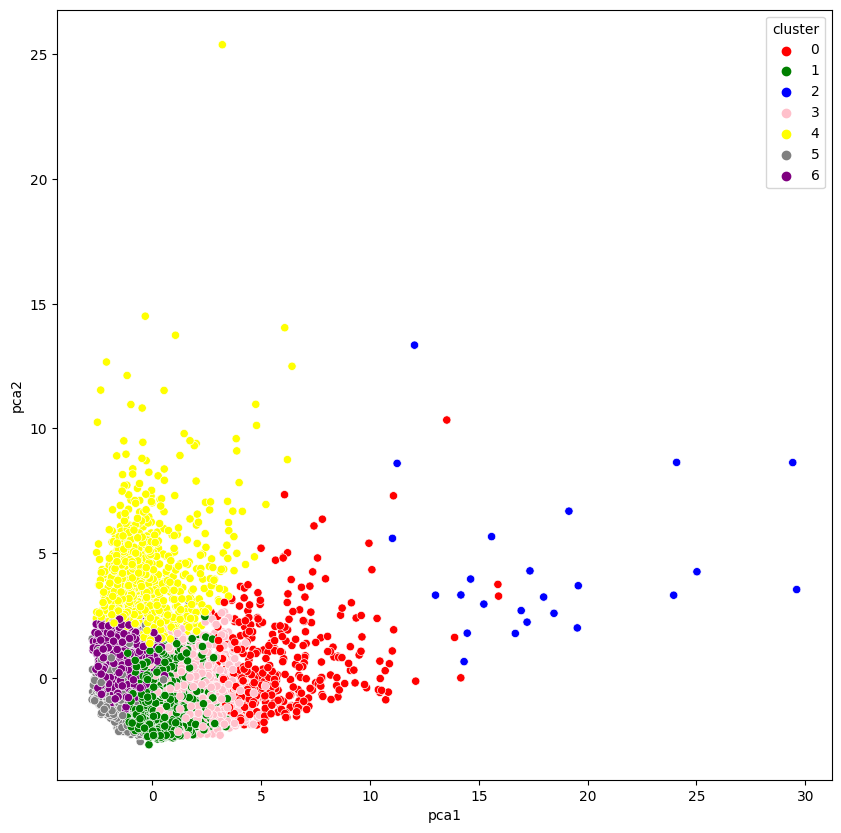

In [33]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

In [ ]:
#As we can see, the different hues represent the different segments of customers, computed by PCA